# Lab 3 Predicting a Categorical Target and Evaluating Performance

We will:
1. Prepare the data
2. Train 3 models: Decision Tree, Support Vector Machine (SVM), and a Neural Net (NN)
3. Get model performance on train and test sets
4. Create appropriate graphs

## Section 1. Load and Inspect the Data

In [37]:
# imports

from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.svm import SVC

In [22]:
howell_full = pd.read_csv("Howell.csv", sep=";")

## Section 2. Data Exploration and Preparation

### 2.1 Create new features

In [23]:
# Compute bmi based on height and weight metric units
def bmi(height, weight):
    return 10000*weight/(height**2)

# New Feature
howell_full['bmi'] = bmi(howell_full['height'], howell_full['weight'])

def bmi_category(bmi):
    # bmi can only be a single value
    if bmi < 18.5: return 'Underweight'
    if bmi < 25.0: return 'Normal'
    if bmi < 30.0: return 'Overweight'
    return 'Obese'

vector_bmi_category = np.vectorize(bmi_category)
howell_full['bmi class'] = vector_bmi_category(howell_full['bmi'])

howell_full['bmi class'].value_counts()

# The following is an array of True/False
over18 = howell_full["age"] > 18

# Only keep the true instances to work with adults
howell_adults = howell_full[over18]

#The not operator is ~ in numpy
howell_children = howell_full[~over18]   

### 2.2 Plot with Masking 

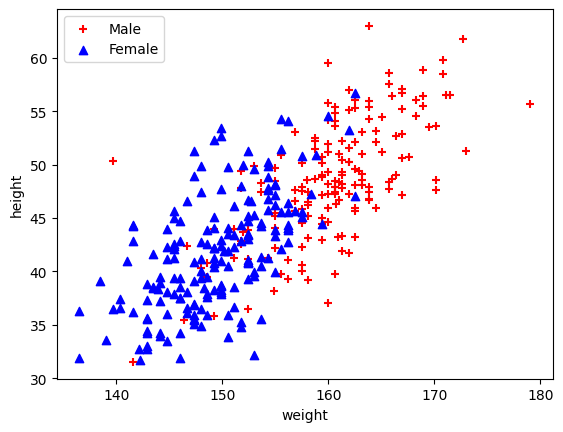

In [24]:
male_height = np.ma.masked_where(howell_adults['male']==0, howell_adults['height'])
female_height = np.ma.masked_where(howell_adults['male']==1, howell_adults['height'])

weight = howell_adults['weight']
plt.scatter(male_height, weight, c='red', marker='+')
plt.scatter(female_height, weight, c='blue', marker='^')

plt.xlabel('weight')
plt.ylabel('height')
plt.legend(['Male', 'Female'])
plt.show()

## Section 3. Feature Selection and Justification

### 3.1 Choose features and targetFirst:

1. input features: Height,
target: Gender
Second:

2. input features:  Weight,
target: Gender
Third:

3. input features: Height, Weight
target: Gender
 

Justify your selections

Height and weight are likely to show patterns based on gender.
Age could contribute to secondary patterns. By restricting our data to adults, we help mitigate some of this. 

### 3.2 Define X (features) and y (target)

In [25]:
# Define the input features before splitting
# Case 1: Height only
#X = howell_adults[['height']]
#y = howell_adults['male']

# Case 2: Weight only
# X = howell_adults[['weight']]
# y = howell_adults['male']

# Case 3: Height + Weight
X = howell_adults[['height', 'weight']]
y = howell_adults['male']

### Reflection 3:
1. Why did you choose these features? These features were chosen because they are likely to show patterns based on geneder.
2. How might they impact predictions or accuracy? There's still variation to take into account, due to passenger class. Height and weight may decrease accuracy.

## Section 4. Train a Classification Model (Decision Tree)

### 4.1 Split the Data

In [26]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

Train size:  276 Test size:  70


### 4.2 Train Model (Decision Tree)

In [27]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4.3 Evaluate Model Performance

In [28]:
# Evaluate model performance on training data

# Predict and evaluate training data (X train)
y_pred = tree_model.predict(X_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y_train, y_pred))  

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       131

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276



In [29]:
# Evaluate model performance on test data:

# Predict and evaluate test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        37
           1       0.71      0.67      0.69        33

    accuracy                           0.71        70
   macro avg       0.71      0.71      0.71        70
weighted avg       0.71      0.71      0.71        70



### 4.4 Report Confusion Matrix (as a heatmap)

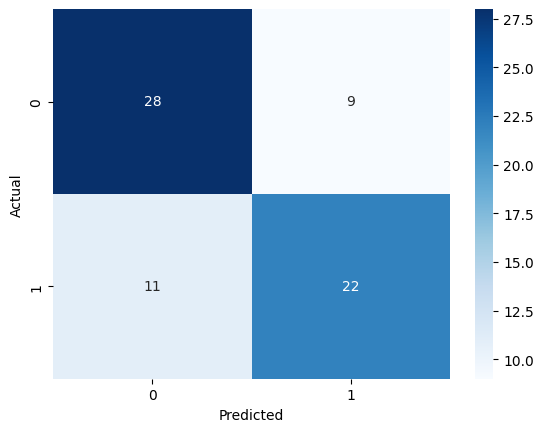

In [30]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

### 4.5 Report Decision Tree Plot

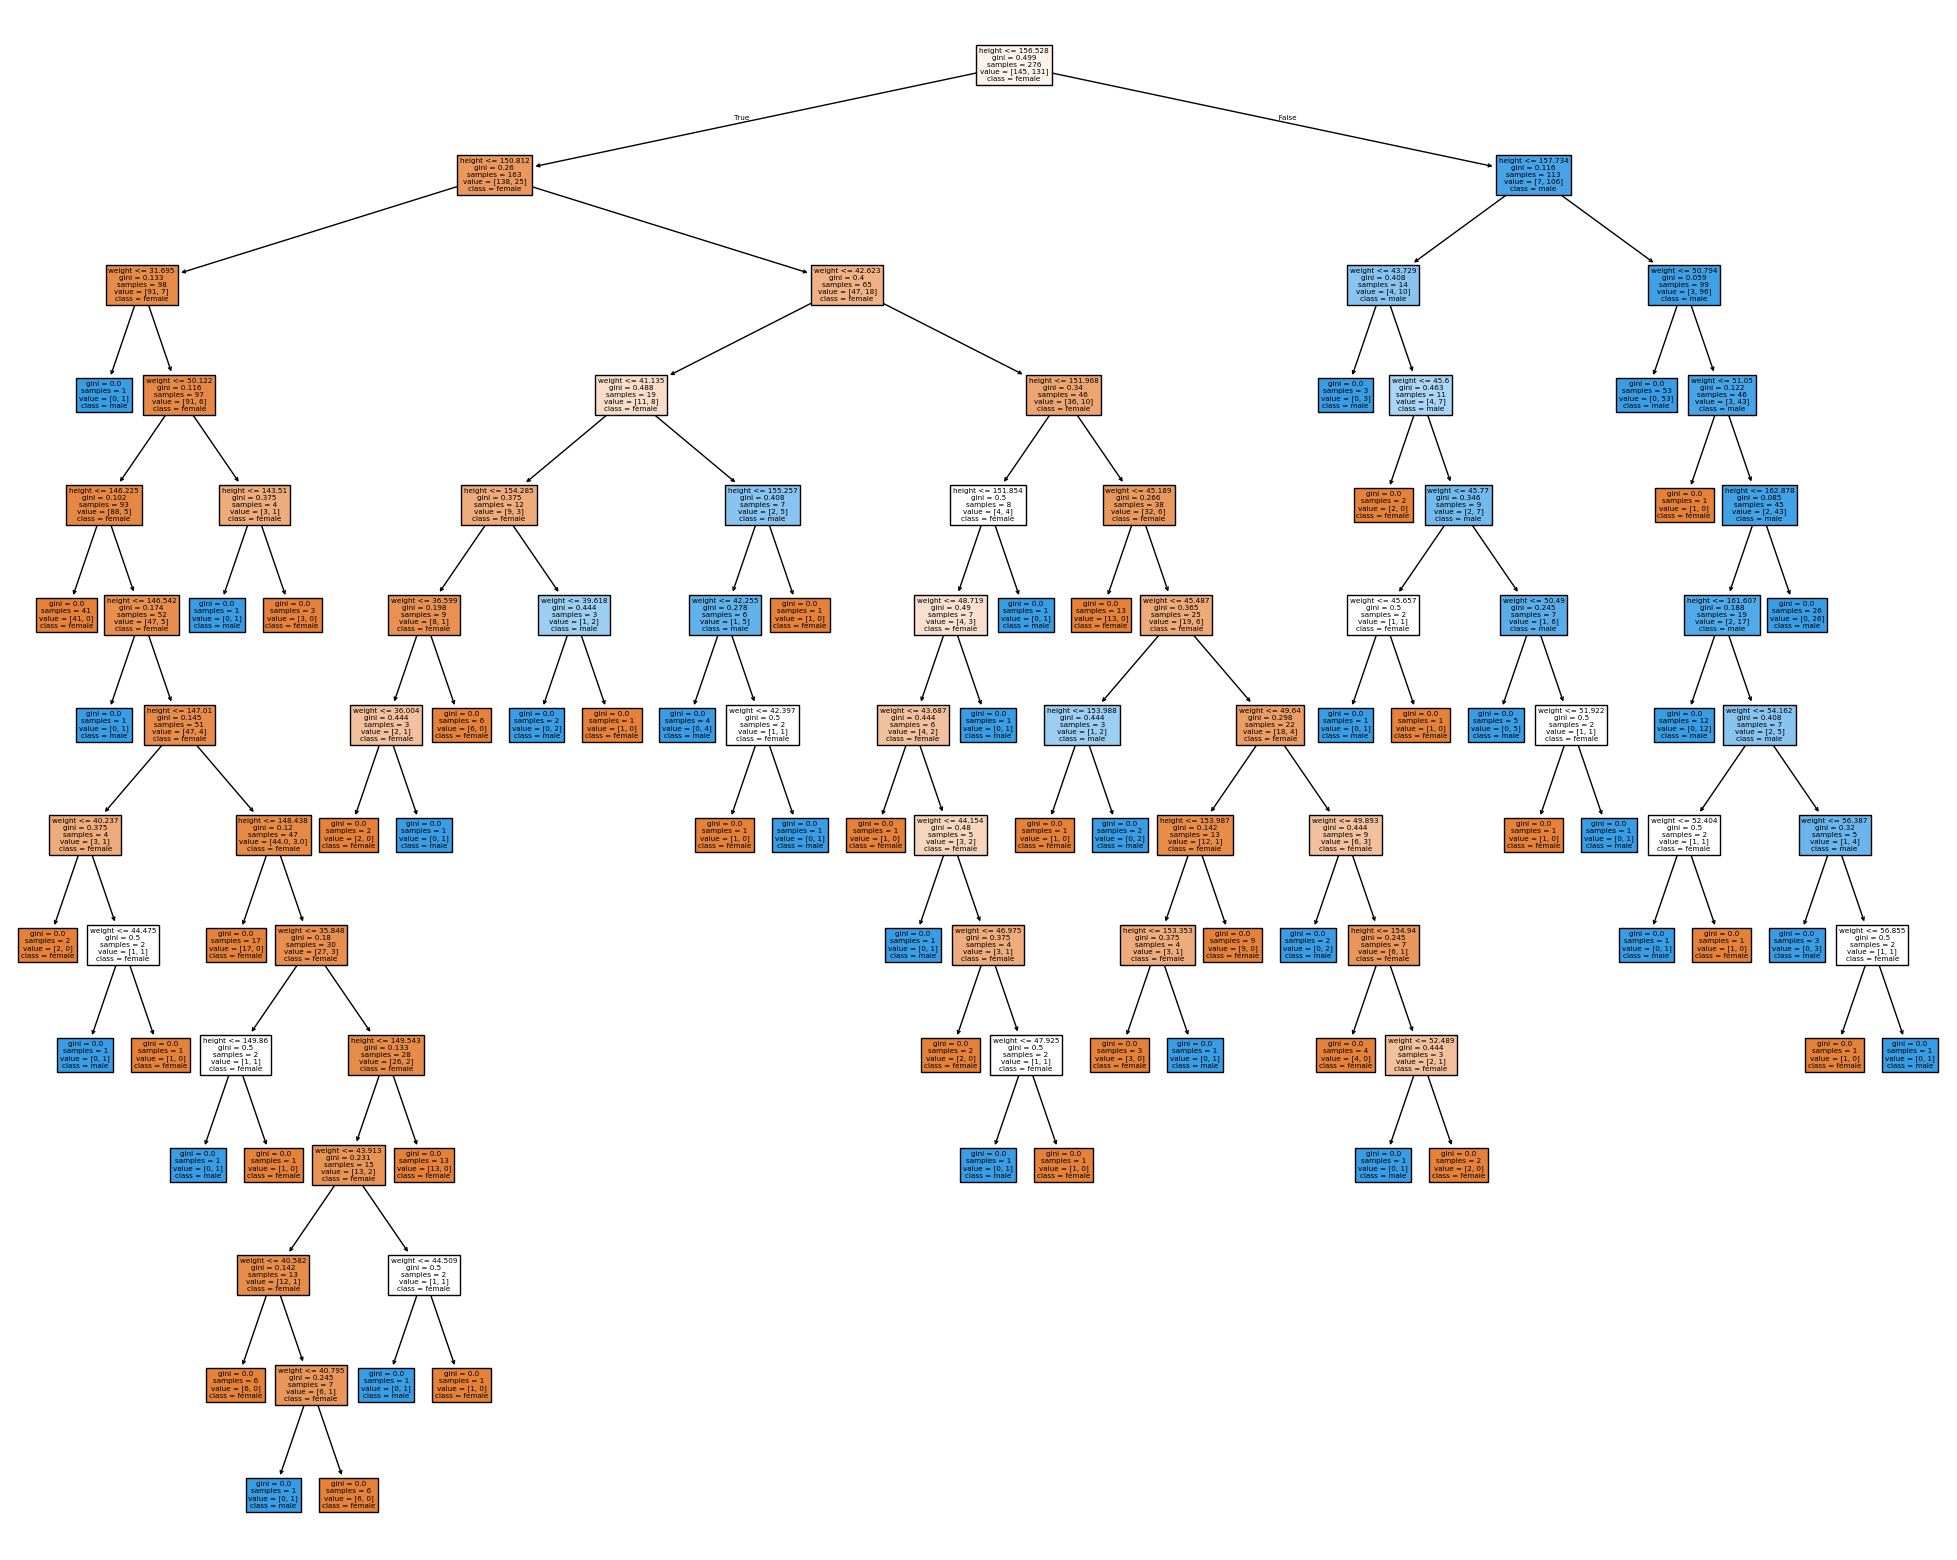

In [31]:
# Plot the DT model. We give the plotter the names of the features and the names of the categories for the target. Save the image so we can use it in other places.

fig = plt.figure(figsize=(25,20))
plot_tree(tree_model,feature_names=['height', 'weight'],class_names=['female', 'male'],filled=True)
fig.savefig("decision_tree_howell.png")

### Reflection 4:
1. How well did the models perform?
2. Are there any surprising results?
3. Which worked better: just height, just weight, or using both together? 

## Section 5. Compare Alternative Models (SVC, NN)

### 5.1 Train Support Vector Classifier (SVC) Model

In [32]:
# Train an SVM model using height and weight. Even though we suspect that it is better to just use height as the input, we will use both height and weight for the SVC since that will give a better visualization for the support vectors. 

svc_model = SVC()
svc_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [33]:
#Predict and evaluate SVC model:

y_pred_svc = svc_model.predict(X_test)

print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        37
           1       0.76      0.76      0.76        33

    accuracy                           0.77        70
   macro avg       0.77      0.77      0.77        70
weighted avg       0.77      0.77      0.77        70



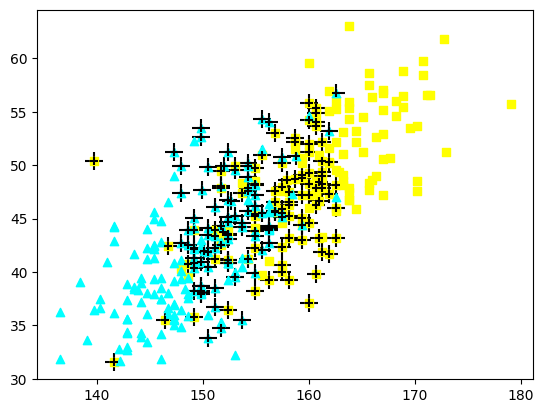

In [34]:
#1. We are using yellow squares for males
#2. We are using cyan for females.
#3. We are using black pluses for the support vectors. Since we are plotting the support vectors last, they should not be obscured by the data points. Plus will let the male/female instances show through
# get the values for the support vectors (the special instances)

support_x = [x for (x,y) in svc_model.support_vectors_]
support_y = [y for (x,y) in svc_model.support_vectors_]
# Now your scatter plot will work correctly:
plt.scatter(support_x, support_y, c='black', marker='+', label='Support Vectors', s=150)
plt.scatter(male_height, weight, c='yellow', marker='s')
plt.scatter(female_height, weight, c='cyan', marker='^')
plt.scatter(support_x, support_y, c='black', marker='+')

### 5.2 Train a Neural Network (NN) Model

In [35]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [38]:
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X_train, y_train) 

C:\Users\Megan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [39]:
# Predict and evaluate Neural Network model:

y_pred_nn = nn_model.predict(X_test)

print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        37
           1       0.74      0.79      0.76        33

    accuracy                           0.77        70
   macro avg       0.77      0.77      0.77        70
weighted avg       0.77      0.77      0.77        70



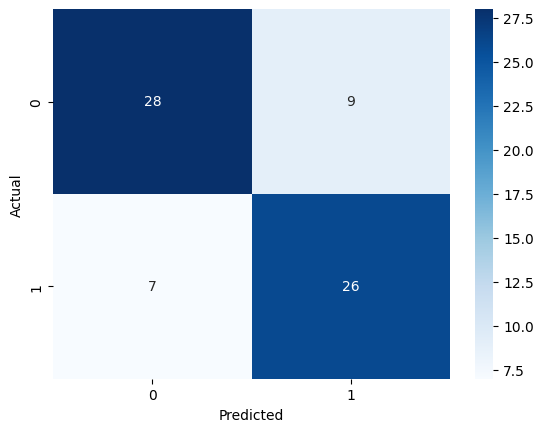

In [40]:
# Plot confusion matrix:

cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Reflection 5:
1. How well did each model perform?
2. Are there any surprising results?
3. Why might one model outperform the others?

## Section 6. Final Thoughts & Insights

### 6.1 Summarize Findings
1. What indicators are strong predictors of gender?
2. Decision Tree performed well but overfit slightly on training data.
3. Neural Network showed moderate improvement but introduced complexity.